In [320]:
import gym
from gym import error, spaces, utils
from gym.utils import seeding
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [280]:
class RandomWalkEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, size):
        self.action_space = spaces.Discrete(2)
        self.size = size
    
    def step(self):
        reward = 0
        action = np.random.randint(0, 2)
        done = False
        if (action == 0):
            self.state -= 1
        if (action == 1):
            self.state += 1
        if (self.state >= self.size):
            reward = 1
            done = True
        if (self.state < 0):
            done = True
        return np.array(self.state), reward, done, {}
    
    def reset(self):
        self.state =  int(self.size/2)
        return self.state
    
    def render(self, mode='human', close=False):
        if close:
            return
        for i in range(self.size):
            if i == self.state:
                print('O', end=' ')
            else:
                print('––', end=' ')

In [281]:
env = RandomWalkEnv(19)

In [284]:
env.reset()

9

In [368]:
num_episodes = 1000
alpha = 0.01
n = 4
V = [0.] * 19

for i_episode in range(num_episodes+1):
    state = env.reset()
    T = 999999
    episode_rewards = []
    episode_states = []
    episode_states.append(state)
    for t in itertools.count():
        if t < T:
            next_state, reward, done, _ = env.step()
            episode_rewards.append(reward)
            episode_states.append(next_state)
            if done:
                T = t + 1
        
        update_idx = t - n + 1
        if update_idx >= 0:
            G = sum([episode_rewards[i] for i in range(update_idx, min(update_idx+n, T))])
            if update_idx + n < T:
                G += V[next_state]
            V[episode_states[update_idx]] += alpha * (G - V[episode_states[update_idx]])
        
        if update_idx == T - 1:
            break

print(V)            

[0.03279109151785707, 0.07266329462016821, 0.10538319398524297, 0.15058216624903648, 0.1892666514322973, 0.22788568947709073, 0.27080819729855377, 0.31422991340621154, 0.3528924406517128, 0.41537005857963444, 0.4629060466736148, 0.5283680259538754, 0.5782864819174163, 0.6406897011347166, 0.6645597662695922, 0.7318134516006161, 0.7912950217819573, 0.8701934290577764, 0.9334666346893216]


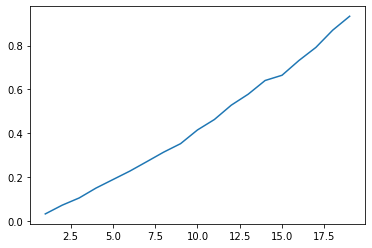

In [369]:
plt.plot(np.arange(1, 20), V)
plt.show()